@Author: Bhupinder Singh

@Date: 13-02-2023

@Last Modified by: Bhupinder Singh

@Last Modified date: 16-02-2023

@Title: Computing Histogram, Carrying out different transformation and also morphological operation.

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from PIL import ImageFilter
import skimage
from skimage import data
import os

Histogram of an image

cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])
images : it is the source image of type uint8 or float32 represented as “[img]”.
channels : it is the index of channel for which we calculate histogram. For grayscale image, its value is [0] and
color image, you can pass [0], [1] or [2] to calculate histogram of blue, green or red channel respectively.
mask : mask image. To find histogram of full image, it is given as “None”.
histSize : this represents our BIN count. For full scale, we pass [256].
ranges : this is our RANGE. Normally, it is [0,256].

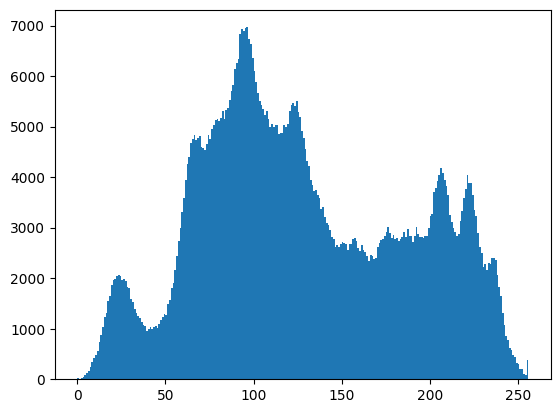

In [8]:
img = cv2.imread('lena.jpg',-1)
plt.hist(img.ravel(),256,[0,256])
plt.show()

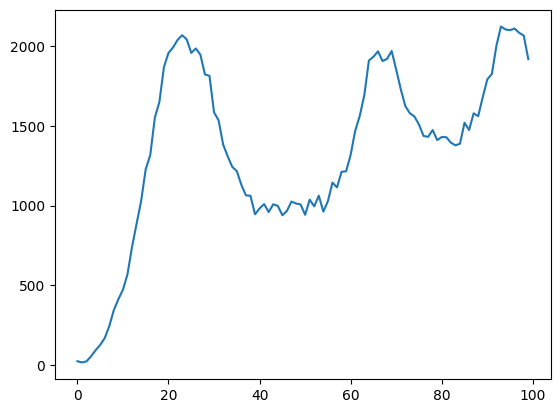

In [10]:
img = cv2.imread('lena.jpg')
  
# find frequency of pixels in range 0-255
histr = cv2.calcHist([img],[1],None,[100],[0,100])
  
# show the plotting graph of an image
plt.plot(histr)
plt.show()

# Image Rotation

In [16]:
image = cv2.imread('lena.jpg')
height, width = image.shape[:2]

#Translation matrix
matrix = cv2.getRotationMatrix2D((width/2,height/2), 10, 0.5)

#Applying the matrix to the image 
translated = cv2.warpAffine(image, matrix, (width, height))

#Showing the image
cv2.imshow('translation', translated)
cv2.waitKey(0)

-1

### Image Scaling

In [7]:
image = cv2.imread('lena.jpg')

image_sized = cv2.resize(image, (300,300))

#Resizing image using Linear interpolation
image_re_linear = cv2.resize(image, None, fx=1.5,fy=1.5, interpolation=cv2.INTER_LINEAR)

#Resizing using Cubic interpolation
image_re_cubic = cv2.resize(image, None, fx=1.5,fy=1.5, interpolation=cv2.INTER_CUBIC)

#Showing all three images
cv2.imshow('Linear', image_re_linear)
cv2.imshow('Cbubic', image_re_cubic)
cv2.imshow('original', image)

if(cv2.waitKey()==ord('q')):
	cv2.destroyAllWindows()

### Image Translation

In [17]:
image = cv2.imread('lena.jpg')

#Translation matrix
matrix = np.float32([[1,0,100],[0,1,100]])

#Applying the matrix to the image 
translated = cv2.warpAffine(image, matrix, (image.shape[1]+100,image.shape[0]+100))

#Showing the image
cv2.imshow('translation', translated)
cv2.waitKey(0)

-1

### Morphological Operations

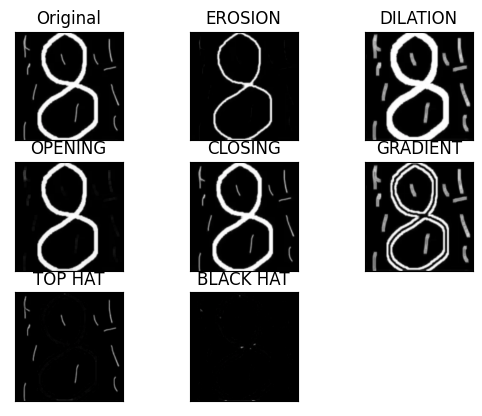

In [41]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('opening.png')
kernel = np.ones((5,5), np.uint8)

erosion = cv2.erode(img,kernel,iterations=1)
dilation = cv2.dilate(img,kernel,iterations=1)
opening = cv2.morphologyEx(img,cv2.MORPH_OPEN,kernel)
closing = cv2.morphologyEx(img,cv2.MORPH_CLOSE,kernel)
gradient = cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel)
tophat  =  cv2.morphologyEx(img,cv2.MORPH_TOPHAT,kernel)
blackhat = cv2.morphologyEx(img,cv2.MORPH_BLACKHAT,kernel)

plt.subplot(331),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(332),plt.imshow(erosion),plt.title('EROSION')
plt.xticks([]), plt.yticks([])
plt.subplot(333),plt.imshow(dilation),plt.title('DILATION')
plt.xticks([]), plt.yticks([])
plt.subplot(334),plt.imshow(opening),plt.title('OPENING')
plt.xticks([]), plt.yticks([])
plt.subplot(335),plt.imshow(closing),plt.title('CLOSING')
plt.xticks([]), plt.yticks([])
plt.subplot(336),plt.imshow(gradient),plt.title('GRADIENT')
plt.xticks([]), plt.yticks([])
plt.subplot(337),plt.imshow(tophat),plt.title('TOP HAT')
plt.xticks([]), plt.yticks([])
plt.subplot(338),plt.imshow(blackhat),plt.title('BLACK HAT')
plt.xticks([]), plt.yticks([])
plt.show()

### Image processing using Pillow

In [11]:
img = Image.open("lena.jpg")

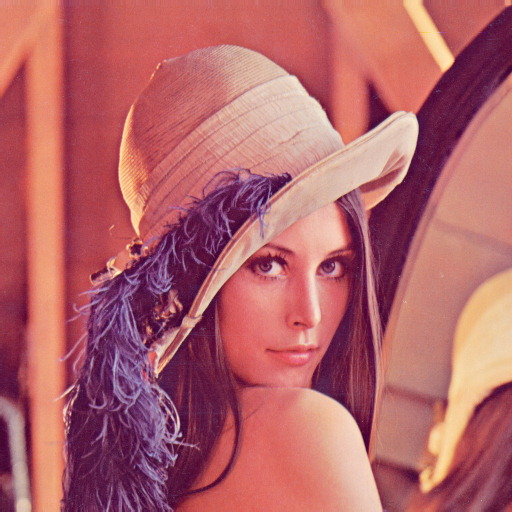

In [12]:
img

Basic Properties

In [14]:
print('Format:',img.format)

print('Size',img.size)

print('Mode:', img.mode)

Format: JPEG
Size (512, 512)
Mode: RGB


Cropping the Image

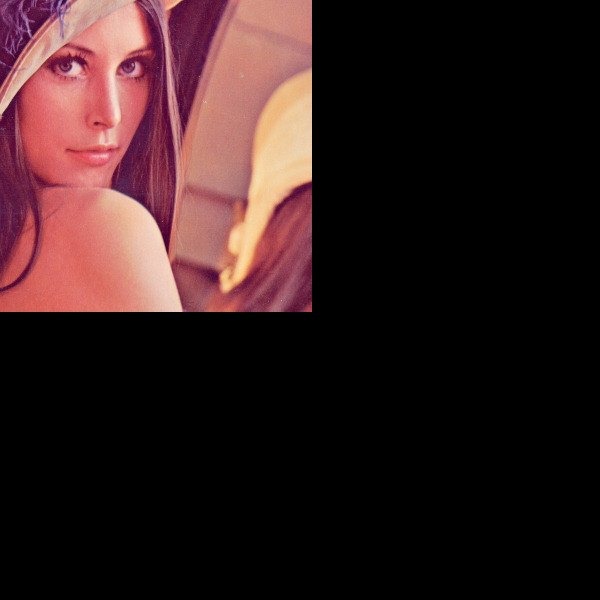

In [15]:
box1 = (200, 200, 800, 800)

crop1 = img.crop(box1)

crop1

Splitting the Image

As we already know from above that the image is in RGB mode, in this step we will split it into ‘L’ mode i.e. a single channel Luminance.

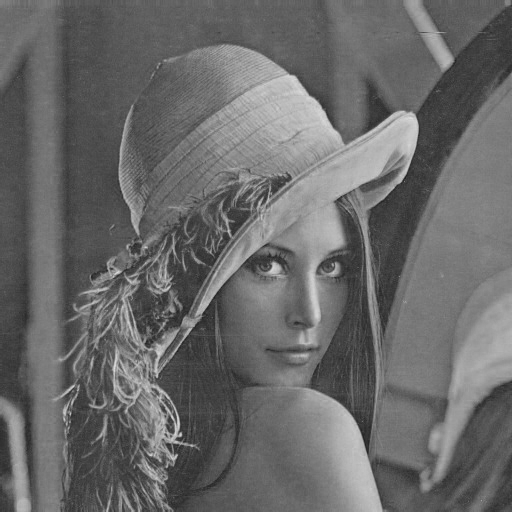

In [19]:
R, G, B = img.split()
B

### Transformations

Resizing 

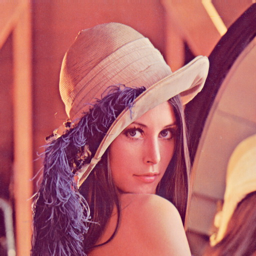

In [20]:
resized_image = img.resize((256, 256))
resized_image

Rotating Image

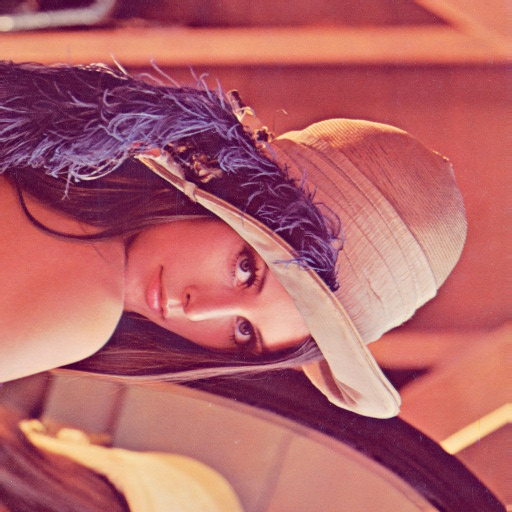

In [22]:
rotated_image = img.rotate(-90)
rotated_image

Transposing Image

C:\Users\Asus\AppData\Local\Temp\ipykernel_23376\1865676167.py:1: DeprecationWarning: FLIP_TOP_BOTTOM is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_TOP_BOTTOM instead.
  tran_image = img.transpose(Image.FLIP_TOP_BOTTOM)


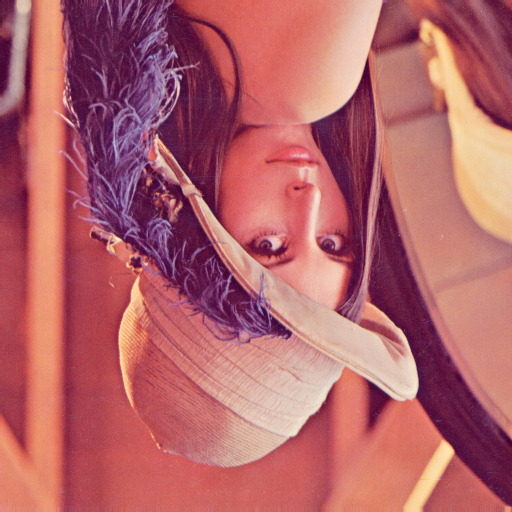

In [23]:
tran_image = img.transpose(Image.FLIP_TOP_BOTTOM)
tran_image

Changing color ("Black and white")

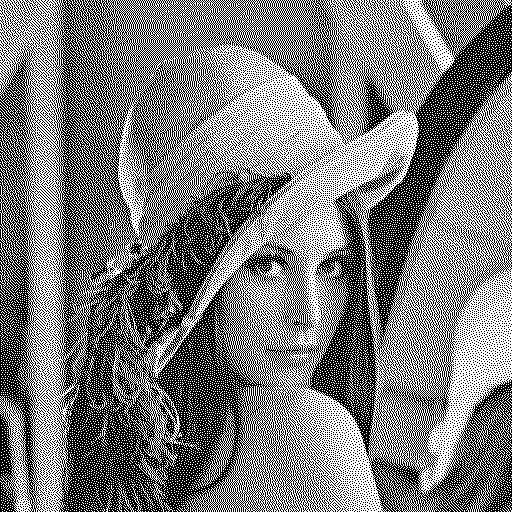

In [27]:
img1 = img.convert('1')
img1

Image processing using scikit-image 

In [2]:
from skimage import io

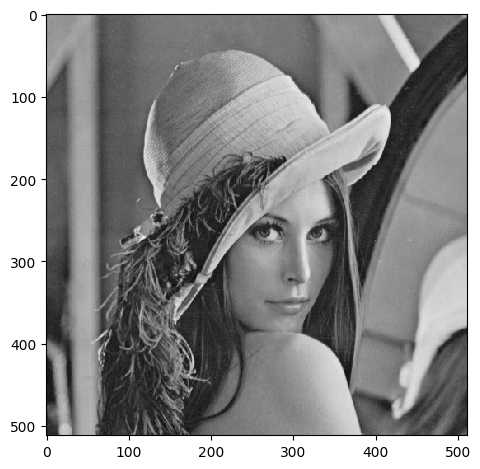

In [4]:
from skimage.io import imread, imshow

image_gray = imread('lena.jpg', as_gray=True)
imshow(image_gray) 

Resizing images

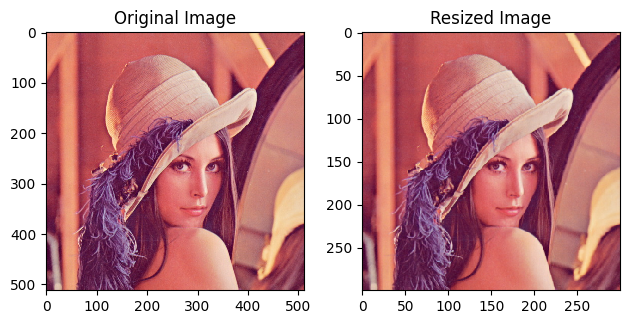

In [8]:
from skimage.transform import resize

#resize image
img_resized = resize(img, (300, 300))

#plot images
plt.subplot(121), imshow(img)
plt.title('Original Image')
plt.subplot(122), imshow(img_resized)
plt.title('Resized Image')
plt.show() 

Rotating an image

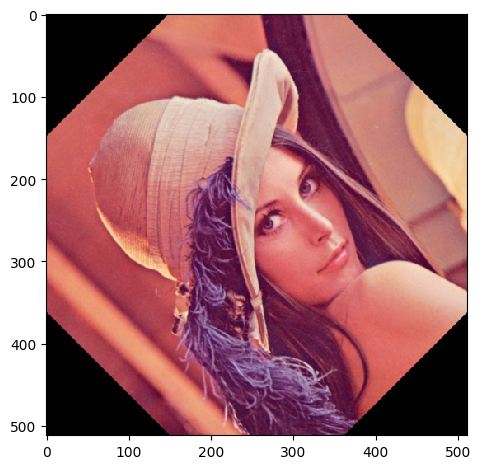

In [9]:
from skimage.transform import rotate


image_rotated = rotate(image, angle=45)
imshow(image_rotated)

Changing the Image Brightness

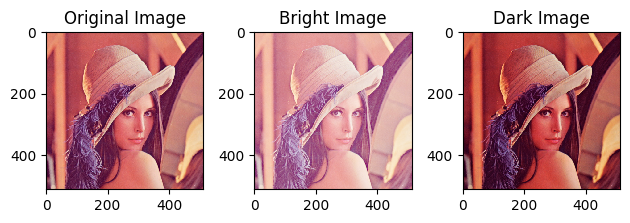

In [14]:
from skimage import exposure

#adjusting brightness

image_bright = exposure.adjust_gamma(image, gamma=0.5,gain=1)
image_dark = exposure.adjust_gamma(image, gamma=1.5,gain=1)

# plotting images
plt.subplot(131), imshow(image)
plt.title('Original Image')

plt.subplot(132),imshow(image_bright)
plt.title('Bright Image')

plt.subplot(133),imshow(image_dark)
plt.title('Dark Image')

plt.show() 